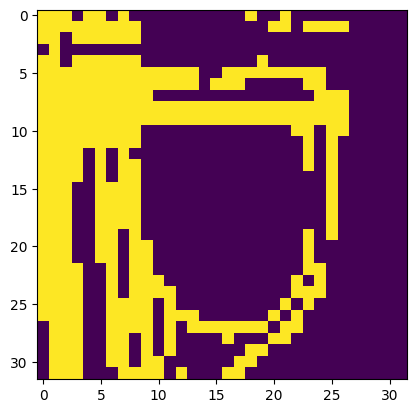

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

config = json.load(open('/home/juheon727/scripts/config.json'))

c1 = np.array(config['c1']).reshape((-1, 1, 1, 3))
c2 = np.array(config['c2']).reshape((-1, 1, 1, 3))
patch_size = config['patch_size']

assert patch_size%2 == 1

#print(c1, c2, sep='\n')

def classify_patches(img):
    r, c, _ = img.shape
    assert r%patch_size == 0 and c%patch_size == 0
    imgs = img.reshape((1,) + img.shape)
    dist1 = np.min(np.sqrt(np.sum((imgs - c1)**2, axis=-1)), axis=0)
    dist2 = np.min(np.sqrt(np.sum((imgs - c2)**2, axis=-1)), axis=0)
    #print(dist1, dist2, sep='\n')
    cls = np.where(dist1 > dist2, 1., 0.)
    kernel = np.ones((2, 2))
    cls = cv2.erode(cls, kernel, iterations=1)
    ret = np.zeros(np.array(img.shape)[:-1]//patch_size)
    for i in range(0, ret.shape[0]):
        for j in range(0, ret.shape[1]):
            if cls[patch_size*i:patch_size*(i+1), patch_size*j:patch_size*(j+1)].sum() > patch_size*patch_size//2:
                ret[i][j] = 1
    plt.imshow(cls)
    #print(cls)
    return ret

img = cv2.imread('/home/juheon727/scripts/road.jpeg')
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#print(img.shape)
#plt.imshow(img)
ret = classify_patches(img)
plt.imshow(ret)